<div class="alert alert-block alert-info">
    <h1>Wahrscheinlichkeitstheorie und Statistik</h1>
    <h2>WS 2020 / 2021</h2>
    <h2>Übung 4</h2>
    <h3>Allgemeine Informationen:</h3>
    <p>Schreiben Sie Ihre Antwort an die Stelle <i>YOUR ANSWER HERE</i>.</p>
    <p>Wenn Sie eine Zelle bearbeiten, löschen Sie die Zeile <i>raise NotImplementedError()</i>.</p>
    <p>Fügen Sie keine neuen Zellen hinzu oder löschen Zellen.</p>
    <h3>Abgabetermin</h3>
    <p>Die Abgabe der Hausaufgabe ist am 5.01.2021 um <strong>12:00 Uhr mittags</strong>! Vergessen Sie nicht Ihre Übung abzugeben.</p>
    <h2>Viel Erfolg!</h2>   
</div>

<div class="alert alert-block alert-warning">
    <h2>Hinweise zur Bearbeitung der Übung</h2>
    <h3>Angabe von Ergebnissen</h3>
    <ul>
        <li>Sie müssen nicht runden. Wir testen ob Ihr Ergebnis um maximal $5\%$ vom exaktem Wert abweicht. $f_{rel }= \frac{|x_{exakt} - x_{Studi}|}{x_{exakt}} \leq 0.05$</li>
        <li>Prozentzahlen werden immer als Zahl zwischen 0 und 1 angegeben. 30% wird somit als 0.3 angegeben.</li>
        <li>Fließkommazahlen werden mit einem Dezimalpunkt angegeben, nicht mit einem Komma. $\frac{1}{4} \rightarrow 0.25$.</li>
    </ul>
    <h3>Programmcode</h3>
    <ul>
        <li>Benutzen Sie nur die in der nächsten Zelle angegebenen Bibliotheken mit den dort benutzten Namen. Wenn Sie also etwas aus der Bibliothek <i>random</i> nutzen wollen, verwenden Sie den Namen <i>rd</i>.</li>
        <li>Das Ergebnis einer Funktion muss mittels <i>return</i> zurückgegeben werden. Ein <i>print</i> Statement ist keine gültige Rückgabe.</li>
        <li>Stellen Sie sicher, dass sich Ihr Code ausführen lässt. Code der nicht läuft kann nicht automatisch bewertet werden.</li>
        <li><strong>Bevor Sie abgeben:</strong> Klicken Sie im Menü auf Kernel > Restart & Run All. Damit führen Sie das Notebook von oben nach unten aus. Alle Fehler die dann auftreten, treten auch beim Bewerten auf.</li>
        <li>Entfernen Sie die Zeilen <i>raise NotImplementedError()</i> wenn Sie eine Aufgabe bearbeiten. Ansonsten wird beim Bewerten eine Exception ausgelöst die uns sagt, dass Sie die Aufgabe nicht bearbeitet haben!</li>
    </ul>
    <h3>Plots</h3>
    <ul>
        <li>Jeder Plot soll eine Achsenbeschriftung, einen Titel, eine Legende und ein Grid haben.</li>
    </ul>
    
</div>

In [3]:
import math
import collections
import itertools        
import glob
import numpy as np
import random as rd
import pandas as pd        
import matplotlib.pyplot as plt
from scipy import stats

# Pandas

In dieser Übung benutzen wir die Python Bibliothek ```pandas```. Eine kurze Einführung dazu finden Sie hier im Jupyterhub im Ordner ```Materials/01-Pandas/Intro-to-Pandas```. Dieser Ordner befindet sich im Hauptverzeichnis des Jupyterhubs.

# Gewicht / Größe

Zusätzlich zu diesem Notebook wurde Ihnen die Datei ```health.csv``` im Ordner ```data``` zur Verfügung gestellt.

Dieser Datensatz enthält Umfrageergebnisse einer Gesundheitsumfrage unter Jugendlichen und jungen Erwachsenen aus den USA (https://www.icpsr.umich.edu/icpsrweb/DSDR/studies/21600).

Im Rahmen der National Longitudinal Study of Adolescent to Adult Health wurden 20000 Teilnehmer zu verschiedensten Themen rund um die Gesundheit befragt. Der Datensatz ```health.csv``` enthält einen Auszug der Fragen und Antworten von ca. 5000 Teilnehmern.

Der Datensatz enthält folgende Werte:

- AID - Pseudonym für jeden Teilnehmer
- H4WGT - Gewicht der Teilnehmer
- H4HGT - Größe der Teilnehmer
- BIO_SEX4 - Geschlecht der Teilnehmer
- H4OD1Y - Das Geburtsjahr der Teilnehmer

## Gewicht / Größe a) [5 Punkte]

Laden Sie die Daten in einen pandas *DataFrame* und benennen Sie die Spalten wie folgt um:

- H4WGT - Gewicht
- H4HGT - Groesse
- BIO_SEX4 - Geschlecht
- H4OD1Y - Geburtsjahr

Nennen Sie den neuen *DataFrame* ```health```

In [4]:
health = None

# öffnen der Datei 
data = pd.read_csv('data/health.csv')
#Dataframe erstellen 
health = pd.DataFrame(data)
# Spalennamen umbenennen
health.rename(columns={'H4WGT': 'Gewicht', 'H4HGT': 'Groesse', 'BIO_SEX4':'Geschlecht', 'H4OD1Y': 'Geburtsjahr'}, inplace=True)

## Gewicht / Größe b) [5 Punkte]

Plotten Sie Gewicht (x-Achse) und Größe (y-Achse) der Teilnehmer in einem Scatterplot. 

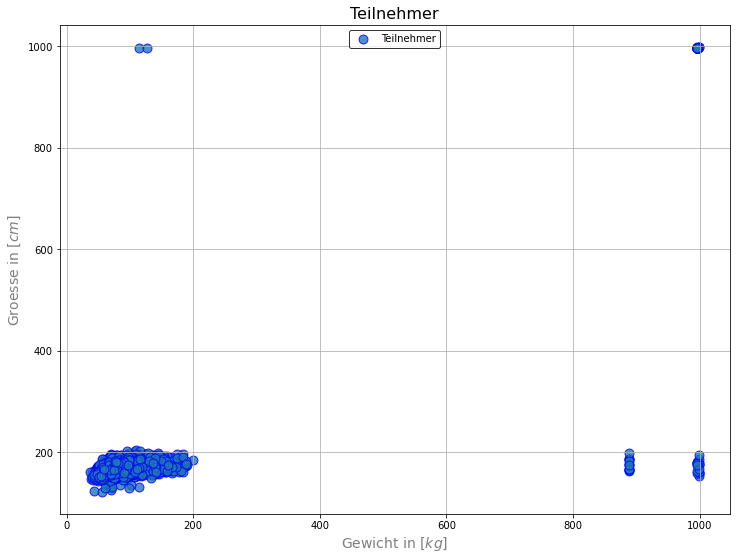

In [5]:
# Erstelle einen Plot der Größe 15*5 Zoll
plt.figure(figsize=(12,9))
# Erstelle einen Plot für Gewicht vs Groesse
rng = np.random.RandomState(0)
colors = rng.rand(5114)
#sizes =   250*rng.rand(5114)   c=colors



plt.scatter(health.Gewicht, health.Groesse,s=80, alpha=0.8,
         linewidth=1,edgecolor='blue' )
#plotten des Graphen
plt.title('Teilnehmer', fontsize=16)
plt.xlabel('Gewicht in [$kg$]', fontsize=14, color='gray')
plt.ylabel('Groesse in [$cm$]', fontsize=14, color='gray')
plt.legend(["Teilnehmer"], loc='upper center', edgecolor='k')
plt.grid(True)

plt.show()

# es wurden eindeutig falsche Werte eingetragen

## Gewicht / Größe c) [10 Punkte]

Anscheinend haben einige Teilnehmer Fantasieangaben zu Größe und Gewicht gemacht. Entfernen Sie alle Einträge die keinen Sinn ergeben (Gewicht > 250kg und Größe > 300cm). Speichern Sie Ihr Ergebnis wieder in der Variablen ```health_cleaned```.

Plotten Sie das Ergebnis erneut.

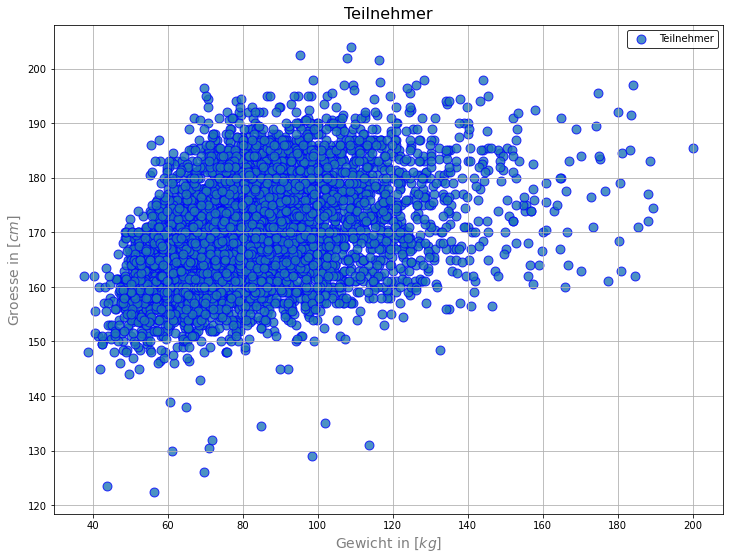

In [6]:
health_cleaned = None
health_cleaned =health
#health.loc[health.Gewicht>250].AID

# falsche Werte herausfiltern
false_values = health_cleaned[ (health_cleaned['Gewicht']>250) |(health_cleaned['Groesse']>300)].index
#löschen der falschen Werte , kann mittels scatterplot ueberprueft werden
health_cleaned.drop(false_values, inplace=True)

# Plotten der Werte ohne Fantasieangaben
plt.figure(figsize=(12,9))
plt.scatter(health_cleaned.Gewicht, health_cleaned.Groesse,s=80, alpha=0.8,
         linewidth=1,edgecolor='blue' )

#plotten des Graphen
plt.title('Teilnehmer', fontsize=16)
plt.xlabel('Gewicht in [$kg$]', fontsize=14, color='gray')
plt.ylabel('Groesse in [$cm$]', fontsize=14, color='gray')
plt.legend(["Teilnehmer"], loc='best', edgecolor='k')
plt.grid(True)

plt.show()

In [7]:
health_cleaned.describe()

,AID,Gewicht,Groesse,Geburtsjahr
count,5.042000e+03,5042.000000,5042.000000,5042.000000
mean,9.426086e+07,84.586612,170.212158,1978.997422
std,6.301911e+06,23.160469,9.968268,1.775261
min,5.710131e+07,37.700000,122.500000,1974.000000
25%,9.257299e+07,67.500000,163.000000,1978.000000
50%,9.471598e+07,81.000000,170.000000,1979.000000
75%,9.757528e+07,97.400000,177.500000,1980.000000
max,9.971998e+07,200.000000,204.000000,1983.000000


## Gewicht / Größe d) [10 Punkte]

Teilen Sie die Daten auf in Frauen und Männer. Plotten Sie für beide das Gewicht und die Größe in dem selben Plot mit verschiedenen Farben.

Speichern Sie die Daten für die Männer im DataFrame ```men```.

Speichern Sie die Daten für die Frauen im DataFrame ```women```.

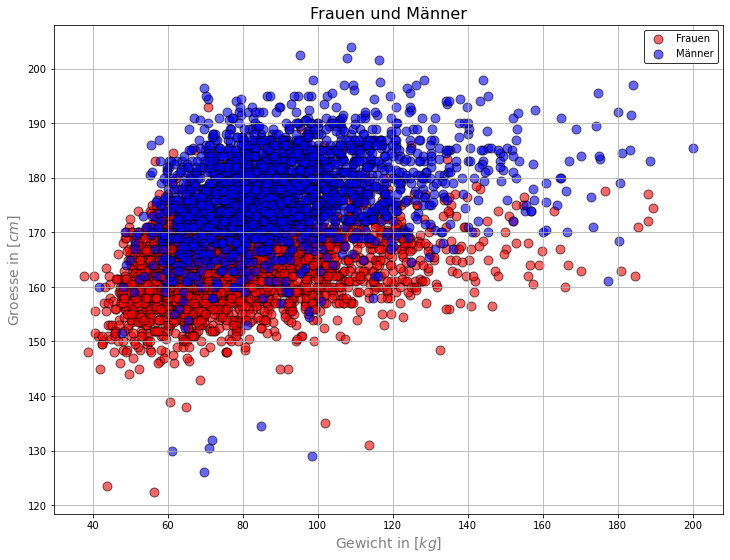

In [8]:
men = None
women = None


#positionen von males in der liste
#pos_men =(health_cleaned['Geschlecht']=='Male')

#filter der Männer und Frauen in jeweil neue Listen
men = health_cleaned.loc[health_cleaned['Geschlecht']=='Male']
women = health_cleaned.loc[health_cleaned['Geschlecht']=='Female']
plt.figure(figsize=(12,9))
#Frauen in rot
plt.scatter(women.Gewicht, women.Groesse,s=80, alpha=0.6,
         linewidth=1,color='red',edgecolor='k', label="Frauen" )
#Männer in blau
plt.scatter(men.Gewicht, men.Groesse,s=80, alpha=0.6,
         linewidth=1,color='blue',edgecolor='k', label="Männer" )
#plotten des Graphen
plt.title('Frauen und Männer', fontsize=16)
plt.xlabel('Gewicht in [$kg$]', fontsize=14, color='gray')
plt.ylabel('Groesse in [$cm$]', fontsize=14, color='gray')
plt.legend( loc='best', edgecolor='k')
plt.grid(True)

plt.show()

## Gewicht / Größe e) [12 Punkte]

Erstellen Sie einen neuen Pandas *DataFrame* (analog zu untenstehender Tabelle) der die charakteristischen Werte der Verteilungen angibt. Nennen Sie Ihren *DateFrame* ```verteilungen```.

| Merkmal | Geschlecht | Mittelwert | Median | Standardabweichung | Varianz |
|---------|------------|------------|--------|--------------------|---------|
| Gewicht | Male       |            |        |                    |         |
| Gewicht | Female     |            |        |                    |         |
| Gewicht | beide      |            |        |                    |         |
| Groesse | Male       |            |        |                    |         |
| Groesse | Female     |            |        |                    |         |
| Groesse | beide      |            |        |                    |         |

In [9]:
import numpy as np

# Füllen Sie folgendes Dictionary mit Werten auf

#Die gesuchten Werte werden über die NumPy funktionen berechnet.
#Diese wurden den man- pages entnommen

data = dict({
    'Merkmal': ['Gewicht', 'Gewicht', 'Gewicht', 'Groesse', 'Groesse', 'Groesse'],
    'Geschlecht': ['Male', 'Female', 'beide', 'Male', 'Female', 'beide'],
    'Mittelwert': [np.mean(men.Gewicht),np.mean(women.Gewicht), np.mean(health_cleaned.Gewicht),
                   np.mean(men.Groesse),np.mean(women.Groesse), np.mean(health_cleaned.Groesse)],
    'Median':     [np.median(men.Gewicht),np.median(women.Gewicht), np.median(health_cleaned.Gewicht),
                   np.median(men.Groesse),np.median(women.Groesse), np.median(health_cleaned.Groesse)],
    'Standardabweichung': 
                  [np.std(men.Gewicht),np.std(women.Gewicht), np.std(health_cleaned.Gewicht),
                   np.std(men.Groesse),np.std(women.Groesse), np.std(health_cleaned.Groesse)],
    
    'Varianz':   [np.var(men.Gewicht),np.var(women.Gewicht), np.var(health_cleaned.Gewicht),
                   np.var(men.Groesse),np.var(women.Groesse), np.var(health_cleaned.Groesse)]
})

# wie erwartet sind Frauen eher kleiner und wiegen weniger als Männer (erste tendenzen)

# Erstelle DataFrame aus data
verteilungen = pd.DataFrame(data)
verteilungen

,Merkmal,Geschlecht,Mittelwert,Median,Standardabweichung,Varianz
0,Gewicht,Male,91.311092,87.4,21.812043,475.765224
1,Gewicht,Female,78.868954,73.9,22.729563,516.633032
2,Gewicht,beide,84.586612,81.0,23.158172,536.300922
3,Groesse,Male,177.584592,178.0,7.700691,59.300647
4,Groesse,Female,163.943560,164.0,6.920017,47.886635
5,Groesse,beide,170.212158,170.0,9.967279,99.346657


In [10]:
# Dies ist eine Testzelle, bitte ignorieren Sie diese!

## Gewicht / Größe f) [10 Punkte]

Beantworten Sie folgende Fragen:

1. Wieviel Prozent der Männer sind schwerer als der Durchschnitt der Männer?

   Speichern Sie Ihre Lösung in ```maenner_schwerer_als_Durchschnitt```
   
   
2. Wieviel Prozent der Frauen sind schwerer als der Durchschnitt der Frauen?

   Speichern Sie Ihre Lösung in ```frauen_schwerer_als_Durchschnitt```
   
   
3. Wieviel Prozent der Frauen sind schwerer als der durchschnittliche Mann?

   Speichern Sie Ihre Lösung in ```frauen_schwerer_als_Durchschnittsmann```
   
   
4. Wieviel Prozent der Frauen sind größer als 50% der Männer?

   Speichern Sie Ihre Lösung in ```frauen_groesser_als_Maenner```
   
   
5. Wieviel Prozent der Männer sind größer als 50% der Frauen?

   Speichern Sie Ihre Lösung in ```maenner_groesser_als_Frauen```
   
   
*Hinweis:* Wenn die Lösung 30% lautet, speichern Sie den Wert als Fließkommazahl 0.3


In [11]:
# Männer und Frauen gesammt
anzahl_men = len(men.index)
anzahl_women= len(women)

# Männer Durchschnittsgewicht
maenner_gew_d = sum(men.Gewicht)/anzahl_men
#Anzahl der Männer die schwerer als der Männerdurchschnitt sind
msd=(len(men[men.Gewicht>maenner_gew_d]))
#Frauen Durchschnittsgewicht
frauen_gew_d =sum(women.Gewicht)/anzahl_women
#Anzahl der Frauen die schwerer als der Frauendurchschnitt sind
fsd=(len(women[women.Gewicht>frauen_gew_d]))
#Anzahl der Frauen die schwerer als der Durschnitt der Männer sind
fsdm =(len(women[women.Gewicht>maenner_gew_d]))

fgm = len(women[women.Groesse > np.mean(men.Groesse)])
mgf = len(men[men.Groesse > np.mean(women.Groesse)])


maenner_schwerer_als_Durchschnitt = msd/anzahl_men
frauen_schwerer_als_Durchschnitt =  fsd/anzahl_women
frauen_schwerer_als_Durchschnittsmann = fsdm/anzahl_women
frauen_groesser_als_Maenner = fgm/anzahl_women
maenner_groesser_als_Frauen = mgf/anzahl_men

## Gewicht / Größe g) [15 Punkte]

Wir möchten versuchen das Gewicht einer Person in Abhängigkeit seiner Größe vorherzusagen. Dazu können wir eine Ausgleichsgerade durch die Punkte legen. 

Eine Ausgleichsgerade ist eine Gerade die den mittleren quadratischen Abstand (das Quadrat der Residuen) zwischen der Gerade und den realen Datenpunkten minimiert. 

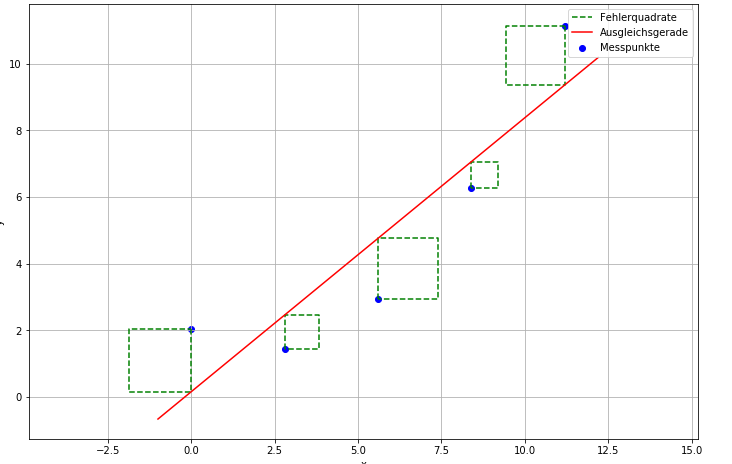

Implementieren Sie die Funktion ```fitLine(x_observed, y_observed)``` die für beobachtete X und Y Werte eine Ausgleichsgerade berechnet. Die Rückgabe der Funktion ist die Steigung und der Y-Achsenabschnitt der Geraden als Tupel.

*Hinweis:* Benutzen Sie keine bereits implementierten Funktionen für die Bestimmung der Ausgleichsgerade. Sie brauchen nur den Mittelwert (numpy.mean).

In [12]:
def fitLine(x_observed: [float], y_observed: [float]) -> (float, float):
    '''
    Berechne eine Ausgleichsgerade der Form:
    f(x) = m * x + b
    
    Arguments:
        x_observed -- x Werte
        y_observed -- y Werte
    Returns:
        m          -- Steigung
        b          -- Achsenabschnitt
    '''
    x = x_observed
    y = y_observed
    ret = ()
    
    #Berechnung der Steigung
    m=sum((y-y.mean())*(x-x.mean()))
    tmp=sum((y-y.mean())**2)
    m=m/tmp
    
    #Berechnung Achsenabschnitt
    b = x.mean()- m * y.mean()
    ret += (m,b)
    
    return ret

## Gewicht / Größe h) [5 Punkte]

Berechnen Sie folgende Ausgleichsgeraden für die Frauen:

1. Vorhersage des Gewichts mittels der Größe
2. Vorhersage der Größe mittels des Gewichts

Speichern Sie Ihre Lösung in den Variablen ```steigung1, achsenabschnitt1``` sowie ```steigung2, achsenabschnitt2```.

In [13]:
# benutzen der fitline Funktion um die Werte zu bestimmen

# Vorhersage des Gewichts mittels der Größe
steigung1 = fitLine(women.Groesse, women.Gewicht)[0]
achsenabschnitt1 = fitLine(women.Groesse, women.Gewicht)[1]

# Vorhersage der Größe mittels des Gewichts
steigung2 = fitLine(women.Gewicht, women.Groesse)[0]
achsenabschnitt2 = fitLine(women.Gewicht, women.Groesse)[1]

steigung2, achsenabschnitt2

(0.8228696979118583, -56.035233261383596)

## Gewicht / Größe i) [10 Punkte]

Plotten Sie die Verteilung der Größe vs Gewicht für die Frauen und zeichnen die oben berechneten Geraden ein.

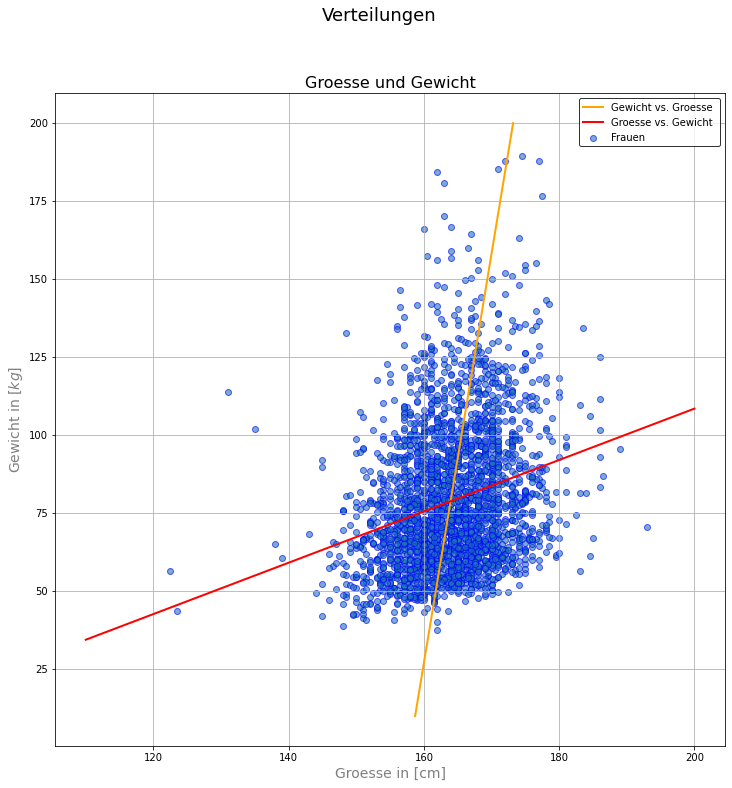

In [14]:
import matplotlib.pyplot as plt



# x-Werte werden sinnvoll angegeben
x_werte = np.linspace(10,200)
x_werte_n = np.linspace(110,200)

# Berechnug der zugehörigen y-Werte
line1 = lambda x: steigung1*x + achsenabschnitt1
line2 = lambda x: steigung2*x + achsenabschnitt2


#Erstellen eines Subplots mit einer Zeile und einer Spalte
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(12,12))
fig.suptitle('Verteilungen', fontsize=18)
#scatterplot mit groesse auf der x-Achse und gewicht auf der y-Achse
plt.scatter(women.Groesse,women.Gewicht,label='Frauen',edgecolor="blue", alpha=0.6)

#plotten der Verteilung Gewicht vs. Groesse als Gerade
plt.plot(line1(x_werte),x_werte, color='orange', linewidth=2, label ='Gewicht vs. Groesse ')


#plotten der Verteilung Groesse vs. Gewicht als Gerade
plt.plot(x_werte_n,line2(x_werte_n), color='red', linewidth=2, label='Groesse vs. Gewicht ')

#Beschreibung des Graphen
plt.title('Groesse und Gewicht', fontsize=16, color='black')
plt.xlabel('Groesse in [cm]', fontsize=14, color='gray')
plt.ylabel('Gewicht in [$kg$]', fontsize=14, color='gray')
plt.legend(loc='best',edgecolor="k")
plt.grid(True)

## Gewicht / Größe j) [10 Punkte]

Implementieren Sie die Funktion ```correlation(x, y)``` welche den Korrelationskoeffizienten zwischen den Datenpunkten ```x``` und ```y``` berechnet.

*Hinweis:* Benutzen Sie keine vordefinierten Funktionen wie ```scipy.stats.pearsonr``` sondern implementieren Sie die Funktion selbst. Sie können selbstverständlich Funktionen wie ```numpy.mean``` oder ```numpy.sqrt``` benutzen.

Sollten Sie diese Teilaufgabe nicht lösen, können Sie im Folgenden mit der Funktion ```scipy.stats.pearsonr``` arbeiten.

In [15]:
#stats.pearsonr([1,2,2,2,],[1,2,2,2])

def correlation(x: [float], y: [float]) -> float:
    '''
    Berechne den Pearson Korrelationskoeffizienten
    
    Args:
        x    -- Eine Liste mit x Werten
        y    -- Eine Liste mit y Werten
    Returns:
        corr -- Korrelationskoeffizient
    '''
    # Funktion aus Vorlesung in Python code umgesetzt:
    z= sum((x-np.mean(x))*(y-np.mean(y)))
    n1=  math.sqrt(sum(  (x-np.mean(x))  **2)  )
    n2=  math.sqrt(sum(  (y-np.mean(y))  **2)  )
    corr=z/(n1*n2)
                                           
    return corr

#Kontrolle der Funktion
#print(correlation([3,4,77,6765,],[5,6,7,88])) 
#stats.pearsonr([3,4,77,6765,],[5,6,7,88])

## Gewicht / Größe k) [5 Punkte]

Berechnen Sie den Korrelationskoeffizienten für Größe und Gewicht der Frauen und speichern Sie Ihre Lösung in der Variablen ```korrelation```. 

In [16]:
#Anwender der korrelations Funktion
#Da die Operation kommutativ ist kann Gewicht und Groesse vertauscht werden
korrelation = correlation(women.Groesse, women.Gewicht)


print(f'Der Korrelationskoeffizient für die Größe und das Gewicht der Frauen ist {korrelation:.4f}.')

Der Korrelationskoeffizient für die Größe und das Gewicht der Frauen ist 0.2505.


## Gewicht / Größe l) [12 Punkte]

Wir wollen nun eine Normalverteilung an die Daten anpassen. In Aufgabenteil e) haben wir bereits die charakteristischen Parameter für die Merkmale **Gewicht** und **Größe** der Frauen und Männer berechnet.

Plotten Sie pro Geschlecht und Merkmal ein Histogramm (mit aktiviertem Parameter ```density=True```). Dies ergibt **4** Plots.

Zeichnen Sie in jeden Plot eine Normalverteilung auf Basis der charakteristischen Parameter.

*Hinweis:* Benutzen Sie die Dichtefunktion pdf aus dem Modul ```stats.norm```.

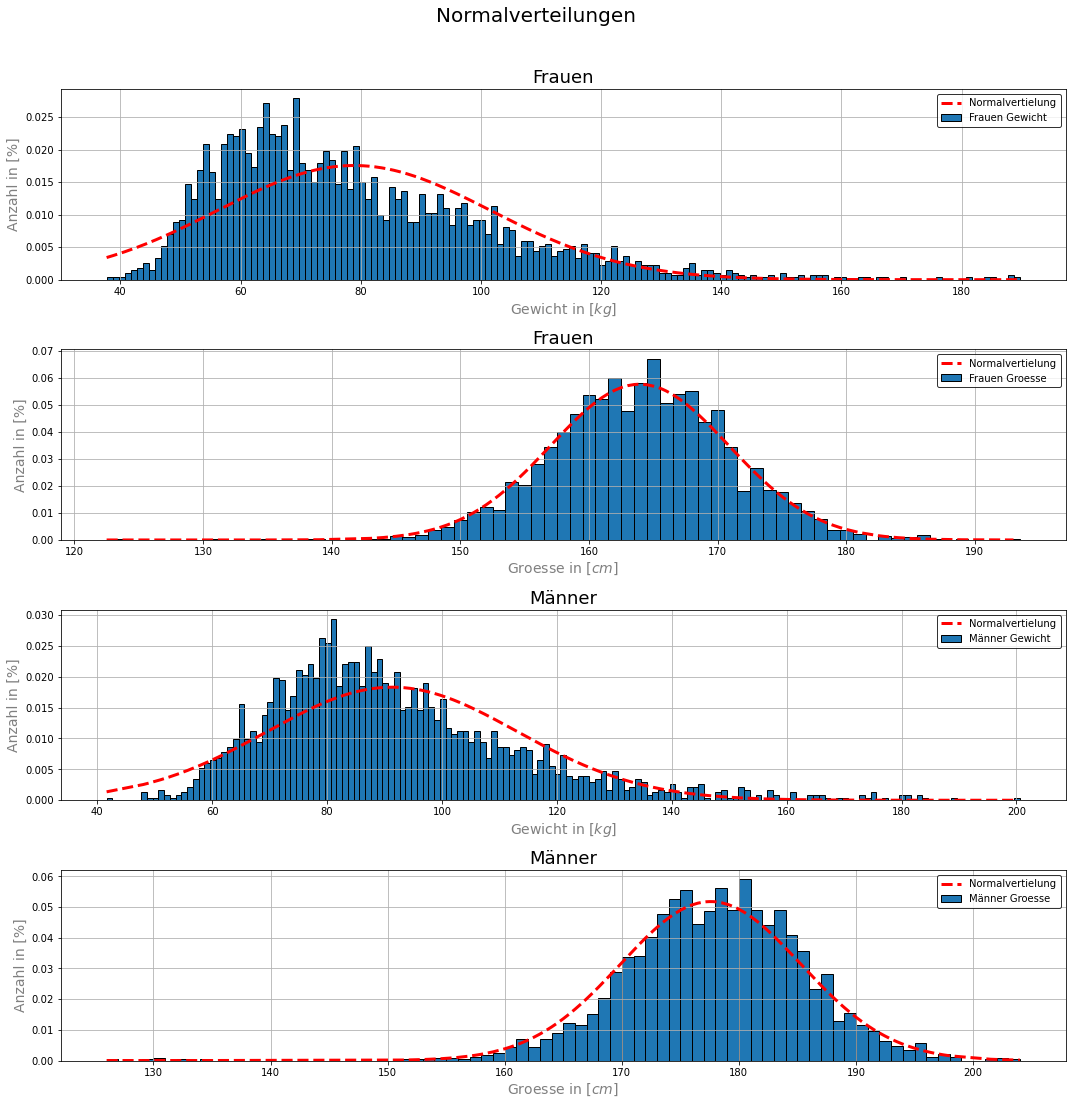

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# Ifdensity=True, draw and return a probability density: each bin will display the
# bin's raw count divided by the total number of counts and the bin width 
#sharex=True


# erstellen der Subplots
fig, axs = plt.subplots(4, 1,figsize=(15,15) )
#Title 
fig.suptitle('Normalverteilungen', fontsize=20, y=1.02)


#berechnung der Normalverteilung mit einer sortiertn Liste
x =sorted(women.Gewicht)
#Parameter: Sortierte Liste, Mittelwert, Standartabweichung
fit_0 = stats.norm.pdf(x, np.mean(x), np.std(x))
#edgecolor="#6A9662"

axs[0].hist(women.Gewicht, bins=np.arange(min((women.Gewicht)), max((women.Gewicht)) + 1, 1),density=True, edgecolor="black",label='Frauen Gewicht')
#plotten der Normalverteilung
axs[0].plot(x,fit_0, 'r--', linewidth=3, label ='Normalvertielung')
axs[0].grid(True)
axs[0].set_title('Frauen', fontsize=18)
axs[0].set_xlabel('Gewicht in [$kg$]', fontsize=14, color='gray')
axs[0].set_ylabel('Anzahl in [%]', fontsize=14, color='gray')
axs[0].legend( loc='best',edgecolor="k")

y =sorted(women.Groesse)
fit_1 = stats.norm.pdf(y, np.mean(y), np.std(y))
axs[1].hist(women.Groesse, bins=np.arange(min((women.Groesse)), max((women.Groesse))+1 , 1),density=True,edgecolor="black", label ='Frauen Groesse')
axs[1].plot(y,fit_1, 'r--', linewidth=3, label ='Normalvertielung')
axs[1].grid(True)
axs[1].set_title('Frauen', fontsize=18)
axs[1].set_xlabel('Groesse in [$cm$]', fontsize=14, color='gray')
axs[1].set_ylabel('Anzahl in [%]', fontsize=14, color='gray')
axs[1].legend( loc='best',edgecolor="k")

z =sorted(men.Gewicht)
fit_2 = stats.norm.pdf(z, np.mean(z), np.std(z))
axs[2].hist(men.Gewicht, bins=np.arange(min((men.Gewicht)), max((men.Gewicht))+1 , 1),density=True, edgecolor="black",label='Männer Gewicht')
axs[2].plot(z,fit_2, 'r--', linewidth=3, label ='Normalvertielung')
axs[2].grid(True)
axs[2].set_title('Männer', fontsize=18)
axs[2].set_xlabel('Gewicht in [$kg$]', fontsize=14, color='gray')
axs[2].set_ylabel('Anzahl in [%]', fontsize=14, color='gray')
axs[2].legend( loc='best',edgecolor="k")

v =sorted(men.Groesse)
fit_3 = stats.norm.pdf(v, np.mean(v), np.std(v))
axs[3].hist(men.Groesse, bins=np.arange(min((men.Groesse)), max((men.Groesse)) + 1, 1),density=True,edgecolor="black", label = 'Männer Groesse')
axs[3].plot(v,fit_3, 'r--', linewidth=3, label ='Normalvertielung')
axs[3].grid(True)
axs[3].set_title('Männer', fontsize=18)
axs[3].set_xlabel('Groesse in [$cm$]', fontsize=14, color='gray')
axs[3].set_ylabel('Anzahl in [%]', fontsize=14, color='gray')
axs[3].legend( loc='best',edgecolor="k")
fig.tight_layout()
plt.show()

## Gewicht / Größe m) [12 Punkte]

Bei näherer Betrachtung fällt auf, dass die Histogramme nicht symmetrisch sondern leicht schief sind.

Eine Verteilung kann linksschief oder rechtsschief sein (vgl. https://de.wikipedia.org/wiki/Schiefe_(Statistik)).

Wir wollen nun eine schiefe Normalverteilung an unsere Daten anpassen. Dazu gibt es das Modul ```stats.skewnorm```. Da die Berechnung der Parameter nicht so einfach ist, können Sie die Funktion ```stats.skewnorm.fit``` nutzen um die charakteristischen Parameter für diese Verteilung zu finden.

Plotten Sie für jedes Merkmal und Geschlecht ein Histogramm, die Normalverteilung aus dem vorigen Aufgabenteil und die schiefe Normalverteilung.

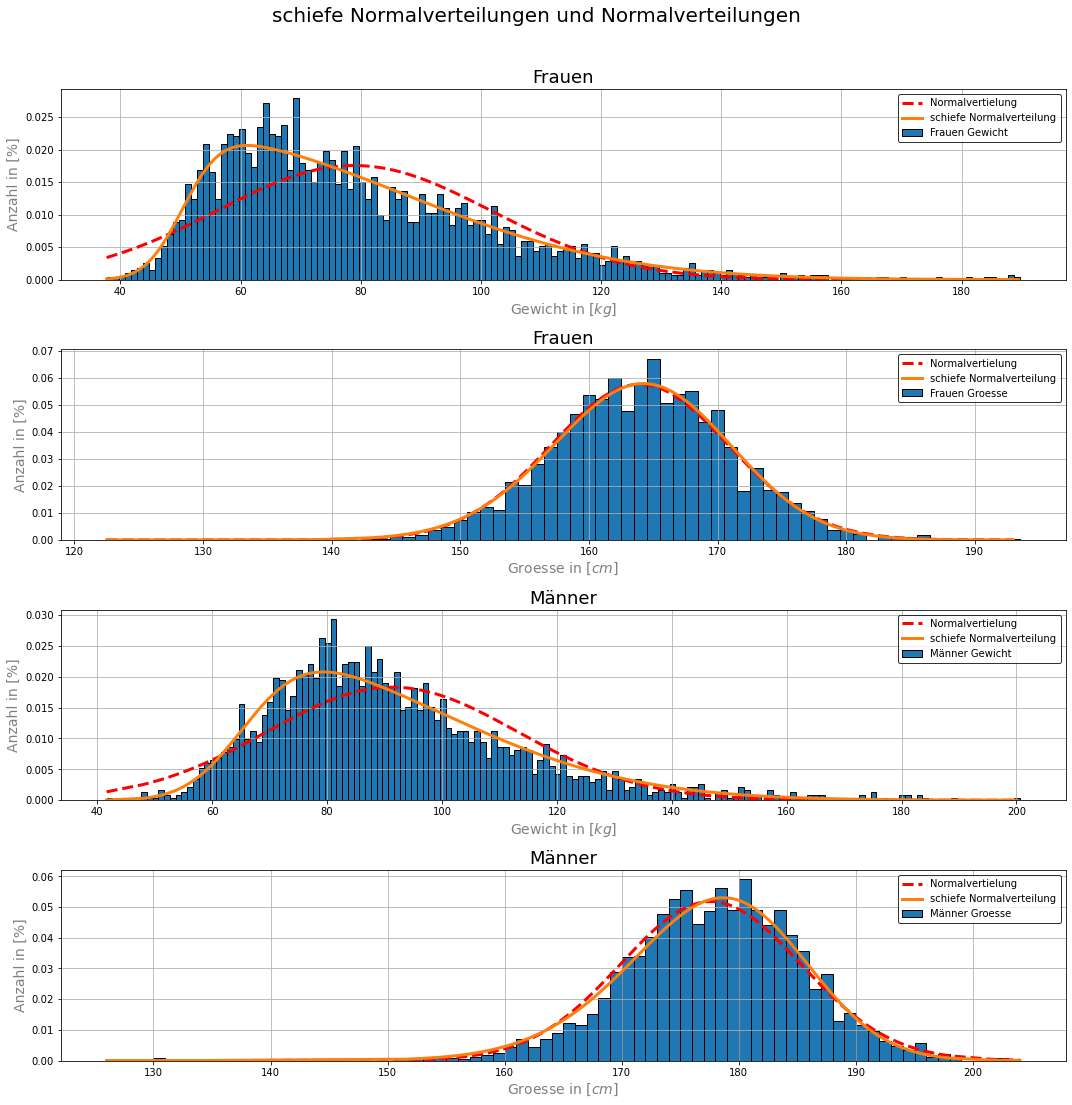

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import norm, skewnorm
import numpy as np

# hier sind weitere ungenutzt skeworm methoden
#params = skewnorm.fit(women.Gewicht)
#a, loc, scale =skewnorm.fit(women.Gewicht)
#p = stats.skewnorm.pdf(women.Gewicht,a, loc, scale)
#mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')
#rv = skewnorm(a)


fig, axs = plt.subplots(4, 1,figsize=(15,15) )

#Title 
fig.suptitle('schiefe Normalverteilungen und Normalverteilungen', fontsize=20, y=1.02)

x =sorted(women.Gewicht)

# Parameter für schiefe Norm.Verteilung aus daten extrahieren: skewness parameter a, location and scale 
a, loc, scale =skewnorm.fit(x)
# Probability density function.
p = stats.skewnorm.pdf(x,a, loc, scale)

fit_0 = stats.norm.pdf(x, np.mean(x), np.std(x))

axs[0].hist(women.Gewicht, bins=np.arange(min((women.Gewicht)), max((women.Gewicht)) + 1, 1),density=True, edgecolor="black",label='Frauen Gewicht')
axs[0].plot(x,fit_0, 'r--', linewidth=3, label ='Normalvertielung')
#plotten der schiefen Normalverteilung
axs[0].plot(x,p,linewidth=3,label='schiefe Normalverteilung')
axs[0].grid(True)
axs[0].set_title('Frauen', fontsize=18)
axs[0].set_xlabel('Gewicht in [$kg$]', fontsize=14, color='gray')
axs[0].set_ylabel('Anzahl in [%]', fontsize=14, color='gray')
axs[0].legend( loc='best',edgecolor="k")

# hier ist die schiefe Norm.Verteilung nahezu iidentisch mit der Normalverteilung
y =sorted(women.Groesse)
a_1, loce_1, scale_1 =skewnorm.fit(y)
q = stats.skewnorm.pdf(y,a_1, loce_1, scale_1)
fit_1 = stats.norm.pdf(y, np.mean(y), np.std(y))
axs[1].hist(women.Groesse, bins=np.arange(min((women.Groesse)), max((women.Groesse))+1 , 1),density=True,edgecolor="black", label ='Frauen Groesse')
axs[1].plot(y,fit_1, 'r--', linewidth=3, label ='Normalvertielung')
axs[1].plot(y,q, linewidth=3,label='schiefe Normalverteilung')
axs[1].grid(True)
axs[1].set_title('Frauen', fontsize=18)
axs[1].set_xlabel('Groesse in [$cm$]', fontsize=14, color='gray')
axs[1].set_ylabel('Anzahl in [%]', fontsize=14, color='gray')
axs[1].legend( loc='best',edgecolor="k")

z =sorted(men.Gewicht)
a_2, loce_2, scale_2 =skewnorm.fit(z)
r = stats.skewnorm.pdf(z,a_2, loce_2, scale_2)
fit_2 = stats.norm.pdf(z, np.mean(z), np.std(z))
axs[2].hist(men.Gewicht, bins=np.arange(min((men.Gewicht)), max((men.Gewicht))+1 , 1),density=True, edgecolor="black",label='Männer Gewicht')
axs[2].plot(z,fit_2, 'r--', linewidth=3, label ='Normalvertielung')
axs[2].plot(z,r,linewidth=3, label='schiefe Normalverteilung')
axs[2].grid(True)
axs[2].set_title('Männer', fontsize=18)
axs[2].set_xlabel('Gewicht in [$kg$]', fontsize=14, color='gray')
axs[2].set_ylabel('Anzahl in [%]', fontsize=14, color='gray')
axs[2].legend( loc='best',edgecolor="k")

v =sorted(men.Groesse)
a_3, loce_3, scale_3 =skewnorm.fit(v)
s = stats.skewnorm.pdf(v,a_3, loce_3, scale_3)
fit_3 = stats.norm.pdf(v, np.mean(v), np.std(v))
axs[3].hist(men.Groesse, bins=np.arange(min((men.Groesse)), max((men.Groesse)) + 1, 1),density=True,edgecolor="black", label = 'Männer Groesse')
axs[3].plot(v,fit_3, 'r--', linewidth=3, label ='Normalvertielung')
axs[3].plot(v,s,linewidth=3 ,label='schiefe Normalverteilung')
axs[3].grid(True)
axs[3].set_title('Männer', fontsize=18)
axs[3].set_xlabel('Groesse in [$cm$]', fontsize=14, color='gray')
axs[3].set_ylabel('Anzahl in [%]', fontsize=14, color='gray')
axs[3].legend( loc='best',edgecolor="k")
fig.tight_layout()
plt.show()

## Frohe Weihnachten

Führen Sie die folgende Zelle aus.

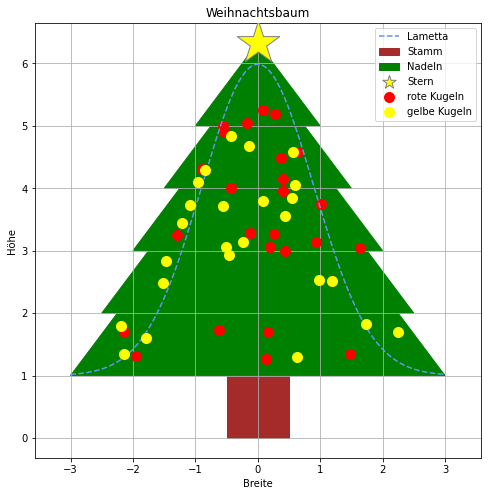

In [1]:
from data import Tree
        
Tree().draw()